In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [70]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Female             0
Male               0
France             0
Germany            0
Spain              0
dtype: int64

In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
gender=pd.get_dummies(df['Gender'])

In [8]:
geography=pd.get_dummies(df['Geography'])

In [9]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [11]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [12]:
df.drop(columns=['Gender','Geography'],inplace=True)

In [13]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df=pd.concat([df,gender,geography],axis=1)

In [17]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop(['Exited'],axis=1)

In [21]:
Y=df[['Exited']]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
seq=Sequential()

<Axes: xlabel='Exited', ylabel='count'>

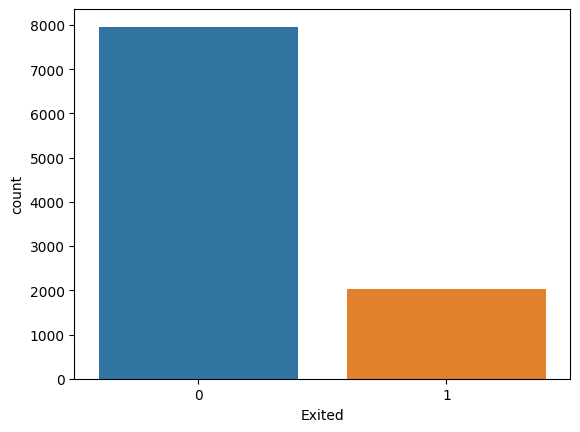

In [29]:
import seaborn as sns
sns.countplot(x=df['Exited'])

In [38]:

seq.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=13))

In [40]:

seq.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [41]:

seq.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [45]:
seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
model_history=seq.fit(x_train,y_train,batch_size=10,validation_split=0.33,epochs=50)

Epoch 1/50
402/402 [==============================] - 3s 4ms/step - loss: 0.5200 - accuracy: 0.7905 - val_loss: 0.4839 - val_accuracy: 0.7996
Epoch 2/50
402/402 [==============================] - 1s 3ms/step - loss: 0.4722 - accuracy: 0.7980 - val_loss: 0.4635 - val_accuracy: 0.7996
Epoch 3/50
402/402 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.7980 - val_loss: 0.4489 - val_accuracy: 0.7996
Epoch 4/50
402/402 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.7980 - val_loss: 0.4409 - val_accuracy: 0.7996
Epoch 5/50
402/402 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.8114 - val_loss: 0.4340 - val_accuracy: 0.8046
Epoch 6/50
402/402 [==============================] - 2s 4ms/step - loss: 0.4205 - accuracy: 0.8159 - val_loss: 0.4304 - val_accuracy: 0.8122
Epoch 7/50
402/402 [==============================] - 2s 5ms/step - loss: 0.4172 - accuracy: 0.8223 - val_loss: 0.4270 - val_accuracy: 0.8157
Epoch 

In [47]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
import matplotlib.pyplot as plt

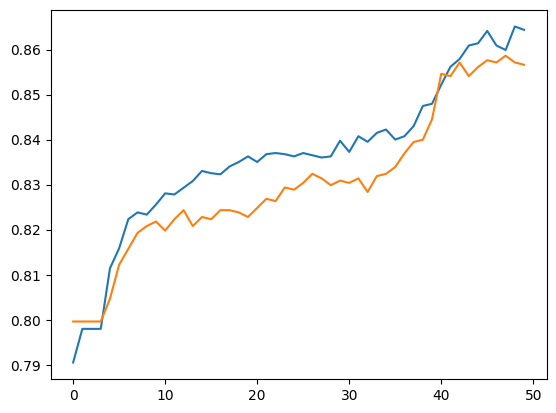

In [50]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

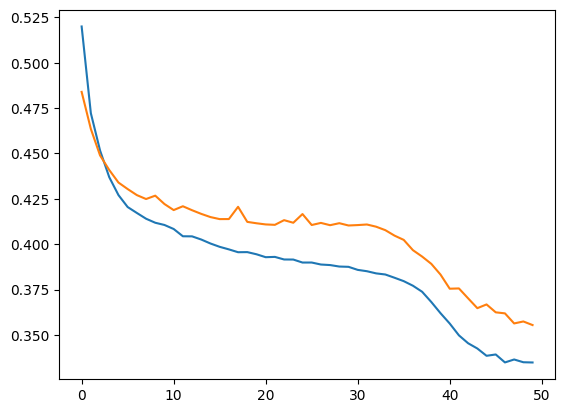

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

In [62]:
y_pred=seq.predict(sc.fit_transform(x_test))


125/125 [==============================] - 0s 3ms/step


In [71]:
y_pred=y_pred>0.5
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [73]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)*100

85.55